In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn import preprocessing
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_init, y = load_wine(return_X_y=True) # wine data set

In [3]:
df_X = pd.DataFrame(X_init, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13'])
df_X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
x1     178 non-null float64
x2     178 non-null float64
x3     178 non-null float64
x4     178 non-null float64
x5     178 non-null float64
x6     178 non-null float64
x7     178 non-null float64
x8     178 non-null float64
x9     178 non-null float64
x10    178 non-null float64
x11    178 non-null float64
x12    178 non-null float64
x13    178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


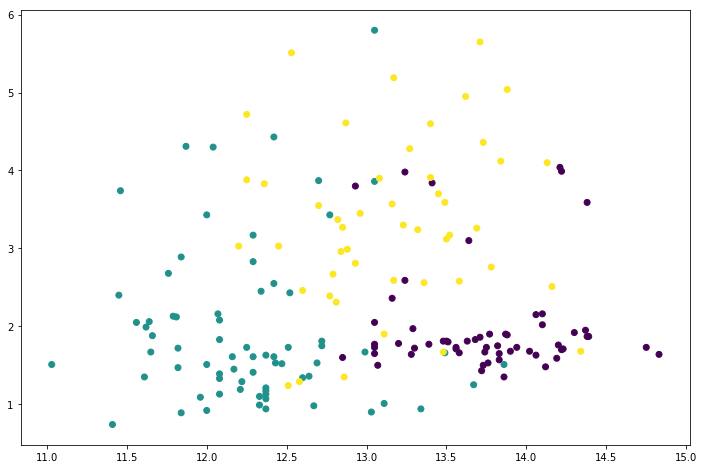

In [5]:
#Visualization
plt.figure(figsize=[12, 8])
plt.scatter(df_X['x1'], df_X['x2'], c = y)
plt.show()

### Classification acording the guid

In [6]:
# Scaling data
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_init)

In [7]:
# Cross-validation adn grid-search
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
print('The range for C \n {}'.format(C_range))
print('\n')
print('The range for gamma \n {}'.format(gamma_range))

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print('\n')
print("The best parameters: %s, score = %0.2f"
      % (grid.best_params_, grid.best_score_))

The range for C 
 [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07
 1.e+08 1.e+09 1.e+10]


The range for gamma 
 [1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00
 1.e+01 1.e+02 1.e+03]


The best parameters: {'C': 1.0, 'gamma': 0.01}, score = 0.99


In [8]:
predict_lables = grid.predict(X)

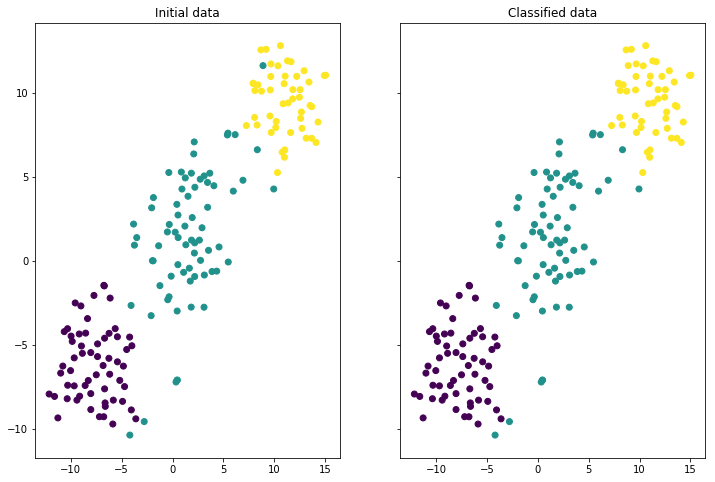

In [9]:
# Visualization of classification
X_embedded = TSNE(n_components=2).fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[12, 8])
ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y)
ax1.set_title('Initial data')
ax2.scatter(X_embedded[:, 0], X_embedded[:, 1], c = predict_lables)
ax2.set_title('Classified data')
plt.show()

In [10]:
### Classification witout scaling
clf = SVC()
clf.fit(X_init, y)

print('The score of the model {}'.format(clf.score(X_init, y)))

The score of the model 1.0


## Classification for manualy generated data

/home/khrystyna/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: covariance is not positive-semidefinite.


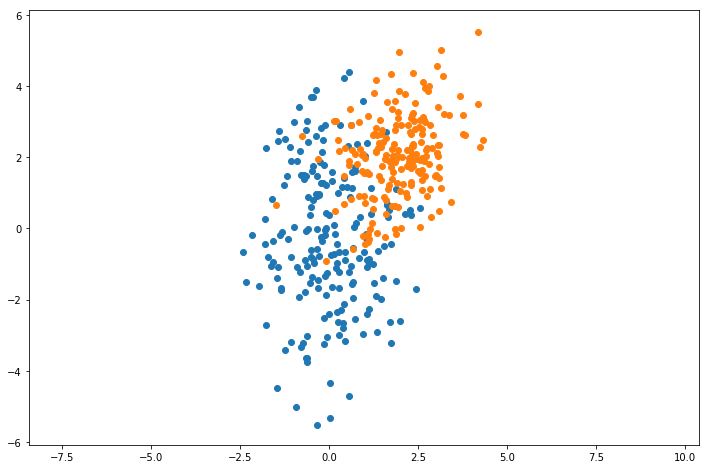

In [11]:
#Generate the data as a mixture of two Gaussians. 

m1 = [0, 0]
c1 = [[1, 0], [0, 4]]  

m2 = [2, 2]
c2 = [[1,1], [0, 1]]

#Total size
N = 200

#Mixing probability.
p = 0.2

plt.figure(figsize=[12, 8])
d1 = np.random.multivariate_normal(m1, c1, N)
d2 = np.random.multivariate_normal(m2, c2, N)
plt.scatter(d1[:, 0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])
plt.axis('equal')
plt.show()

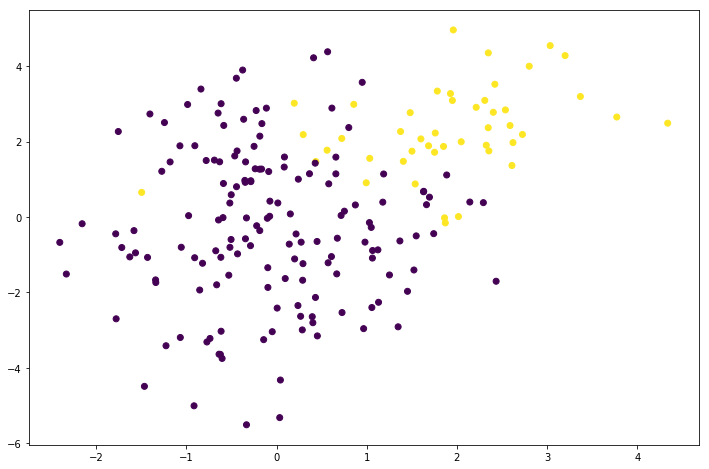

In [12]:
label = np.random.binomial(1, p, size = N)
c = (d1, d2)
data_X = np.array([c[label[i]][i] for i in range(N)])
data_y = 2*label - 1

plt.figure(figsize=[12, 8])
plt.scatter(data_X[:, 0], data_X[:, 1], c = label)
plt.show()

In [13]:
scaled_data_X = scaler.fit_transform(data_X)

param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid_new = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid_new.fit(scaled_data_X, data_y)

print('\n')
print("The best parameters: %s, score = %0.2f"
      % (grid_new.best_params_, grid_new.best_score_))



The best parameters: {'C': 0.1, 'gamma': 1.0}, score = 0.94


In [14]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

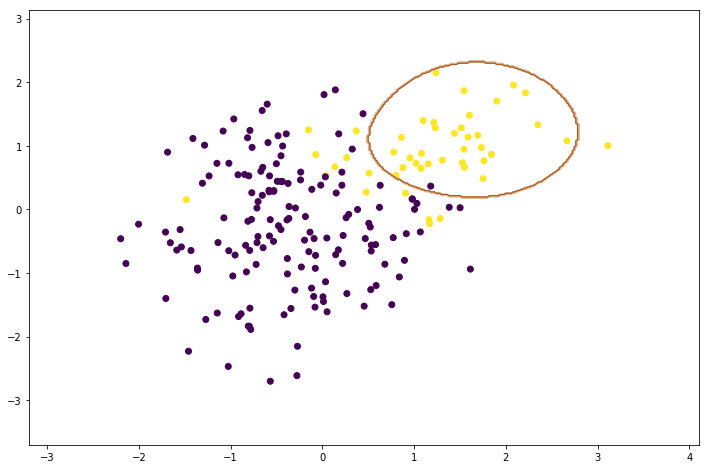

In [17]:
xx, yy = make_meshgrid(scaled_data_X[:, 0], scaled_data_X[:, 1])

Z = grid_new.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=[12, 8])
plt.scatter(scaled_data_X[:, 0], scaled_data_X[:, 1], c = label)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()
